In [20]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#from plotnine import *

from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors

from sklearn.cluster import DBSCAN


from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

from sklearn.metrics import silhouette_score

%matplotlib inline

In [3]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

In [21]:
def Compare(data, ep, minP,k=2):
    score={}
    hac = AgglomerativeClustering(k)
    km = KMeans(k)
    gm = GaussianMixture(k)
    # dbscan
    dbscan = DBSCAN(eps=ep, min_samples=minP).fit(data)

    hac.fit(data[["x","y"]])
    km.fit(data[["x","y"]])
    gm.fit(data[["x","y"]])

    df4=data.copy()
    df4["hac"] = hac.labels_
    df4["km"] = km.labels_
    df4["gm"] = gm.predict(df4[["x","y"]])
    # dbscan
    df4["DB"]= dbscan.labels_
    score['Agglomerat'] =round(silhouette_score(data, df4["hac"]),5)
    score['KMeans'] =round(silhouette_score(data, df4["km"]),5)
    score['GaussianMixture'] =round(silhouette_score(data, df4["gm"]),5)
    score['DBSCAN'] =round(silhouette_score(data, df4["DB"]),5)


    print(ggplot(df4, aes(x = "x", y = "y",
                      color = "factor(hac)")) +
              geom_point() +
              theme_minimal() +
              scale_color_discrete(name = "Cluster Assignment") +
              theme(panel_grid_major = element_blank()) + 
              labs(title = "Hierarchical Agglomeretive"))


    print(ggplot(df4, aes(x = "x", y = "y",
                      color = "factor(km)")) +
              geom_point() +
              theme_minimal() +
              scale_color_discrete(name = "Cluster Assignment") +
              theme(panel_grid_major = element_blank()) + 
              labs(title = "KMeans"))


    print(ggplot(df4, aes(x = "x", y = "y",
                      color = "factor(gm)")) +
              geom_point() +
              theme_minimal() +
              scale_color_discrete(name = "Cluster Assignment") +
              theme(panel_grid_major = element_blank()) + 
              labs(title = "Gaussian Mixtures"))

    print(ggplot(df4, aes(x = "x", y = "y",
                      color = "factor(DB)")) +
              geom_point() +
              theme_minimal() +
              scale_color_discrete(name = "Cluster Assignment") +
              theme(panel_grid_major = element_blank()) + 
              labs(title = "DBSCAN"))

    return score

In [22]:
d1 = pd.read_csv("https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/KMEM1.csv")

d1.head()

,x,y
0,1.206087,1.847686
1,0.351919,0.245691
2,1.201688,0.630774
3,0.733710,1.364328
4,1.150745,0.724892


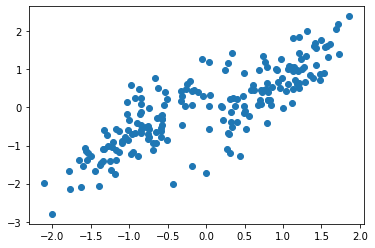

In [23]:
plt.scatter(d1['x'], d1['y'], marker="o", picker=True)

In [24]:
for epsilon in range(10,0,-1):
    print(epsilon/10)

1.0
0.9
0.8
0.7
0.6
0.5
0.4
0.3
0.2
0.1


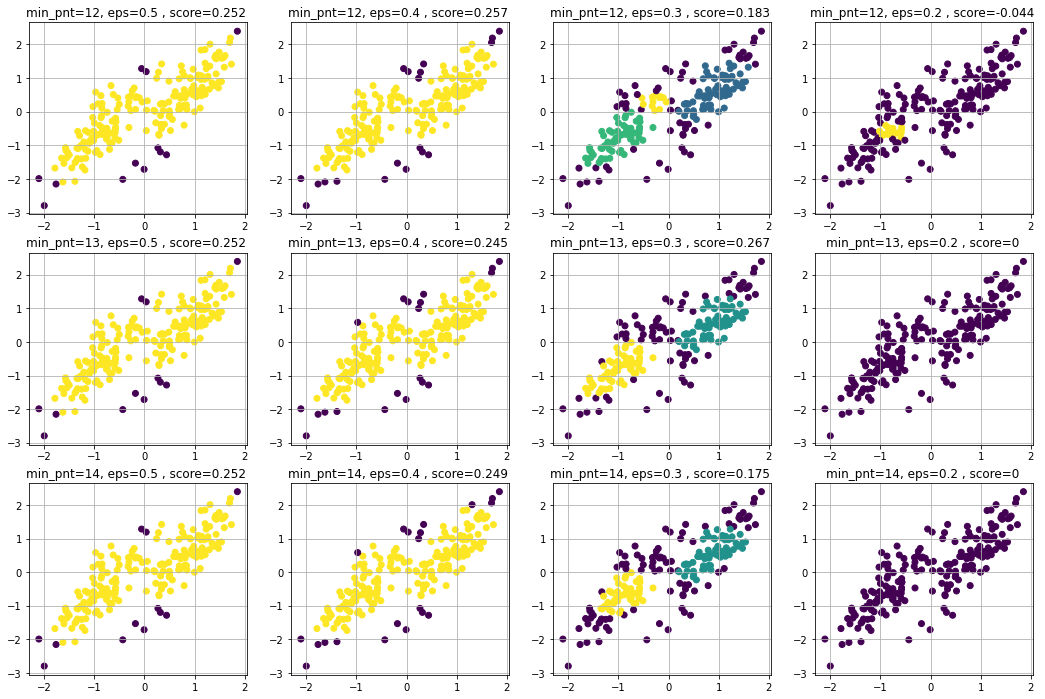

In [26]:
# dbscan and plot 
# epsilon = 5.0
# min_points = 13
silt_score={}
x=0
plt.rcParams["figure.figsize"] = (18,12) 
for min_points in range(12,15):
  for i in range(5,1,-1):
    epsilon = i/10
    dbscan = DBSCAN(eps=epsilon, min_samples=min_points).fit(d1)
    labels = dbscan.labels_

    try:
      silhouette =round(silhouette_score(d1, labels),3)
    except:
      silhouette= 0

    # num_noise = np.sum(np.array(labels) == -1, axis=0)
    # labels_unq = np.unique(labels)
  
    df = d1.copy()
    df['cluster']=labels
    x+=1
    plt.subplot(3,4,x)
    plt.scatter(df['x'], df['y'], c=df['cluster'], marker="o", picker=True)
    plt.title(f'min_pnt={min_points}, eps={epsilon} , score={silhouette} ')

    plt.grid()



In [ ]:
Compare(d1, 0.3, 13)

In [29]:
d2 = pd.read_csv("https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/KMEM2.csv")

d2

,x,y
0,1.578527,1.408111
1,1.748206,0.441915
2,1.523151,0.681521
3,1.318949,0.362971
4,0.977164,-0.373589
...,...,...
295,-0.522015,1.682249
296,-0.195039,1.177602
297,0.004994,1.111269
298,-1.954443,0.506557


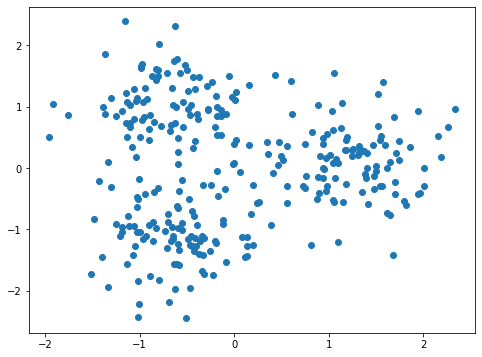

In [30]:
plt.rcParams["figure.figsize"] = (8,6) 
plt.scatter(d2['x'], d2['y'], marker="o", picker=True)

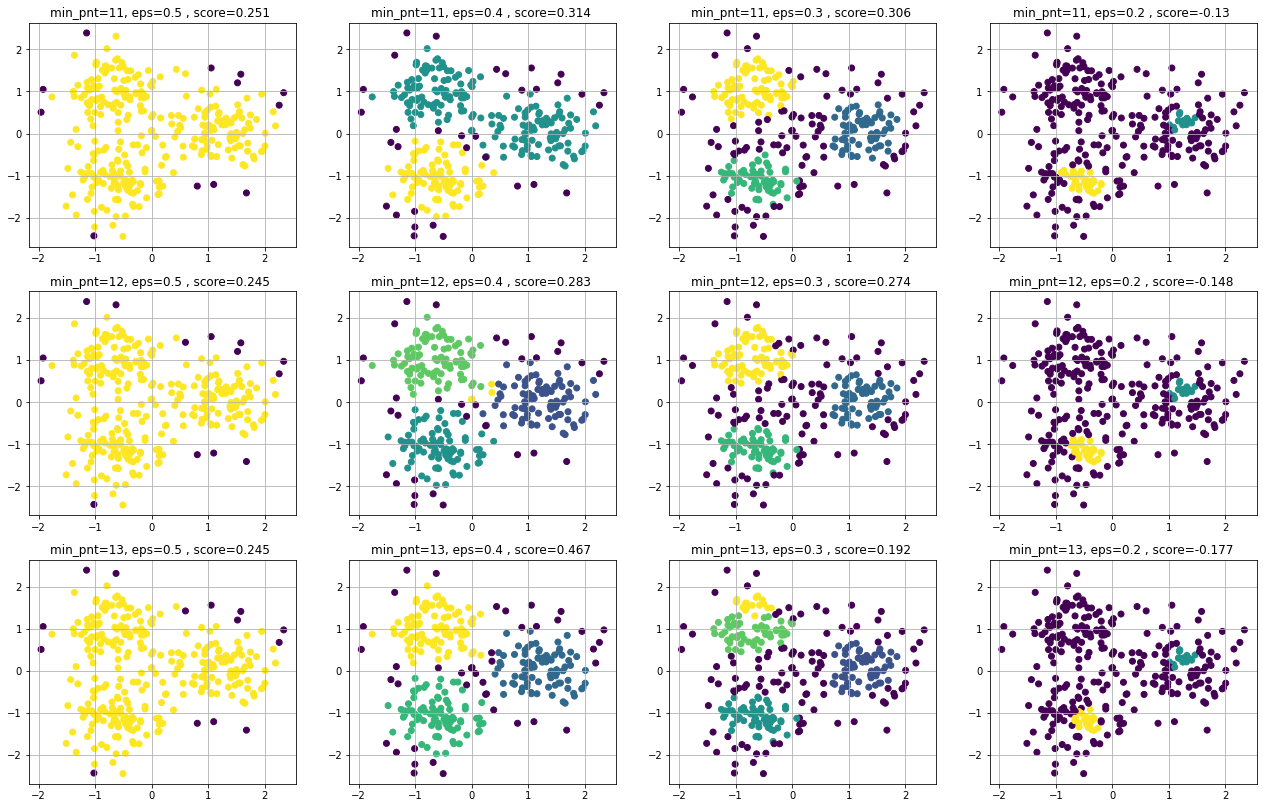

In [31]:
x=0
plt.rcParams["figure.figsize"] = (22,14) 
for min_points in range(11,14):
  for i in range(5,1,-1):
    epsilon = i/10
    dbscan = DBSCAN(eps=epsilon, min_samples=min_points).fit(d2)
    labels = dbscan.labels_
    try:
      silhouette =round(silhouette_score(d2, labels),3)
    except:
      silhouette= 0

    df = d2.copy()
    df['cluster']=labels
    x+=1
    plt.subplot(3,4,x)
    plt.scatter(df['x'], df['y'], c=df['cluster'], marker="o", picker=True)
    plt.title(f'min_pnt={min_points}, eps={epsilon} , score={silhouette} ')
    plt.grid()


In [ ]:
Compare(d2, 0.4, 11,3)

[897.9999999999999, 483.5648353571164, 138.09226814915638, 95.63432371041831, 82.14101423816636, 70.7012453340215, 61.95593064488305, 56.53649515680513, 50.613395845684536, 46.389461371948904]


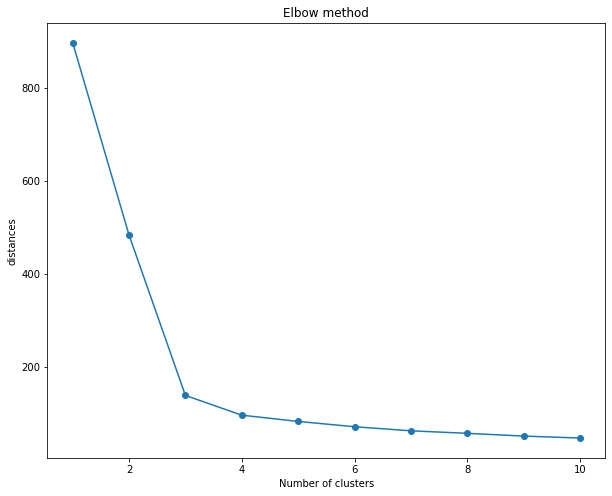

In [45]:
distances = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(d5)
    distances.append(kmeans.inertia_)


print(distances)
plt.rcParams["figure.figsize"] = (10,8)
plt.plot(range(1,11), distances, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('distances')
plt.show()